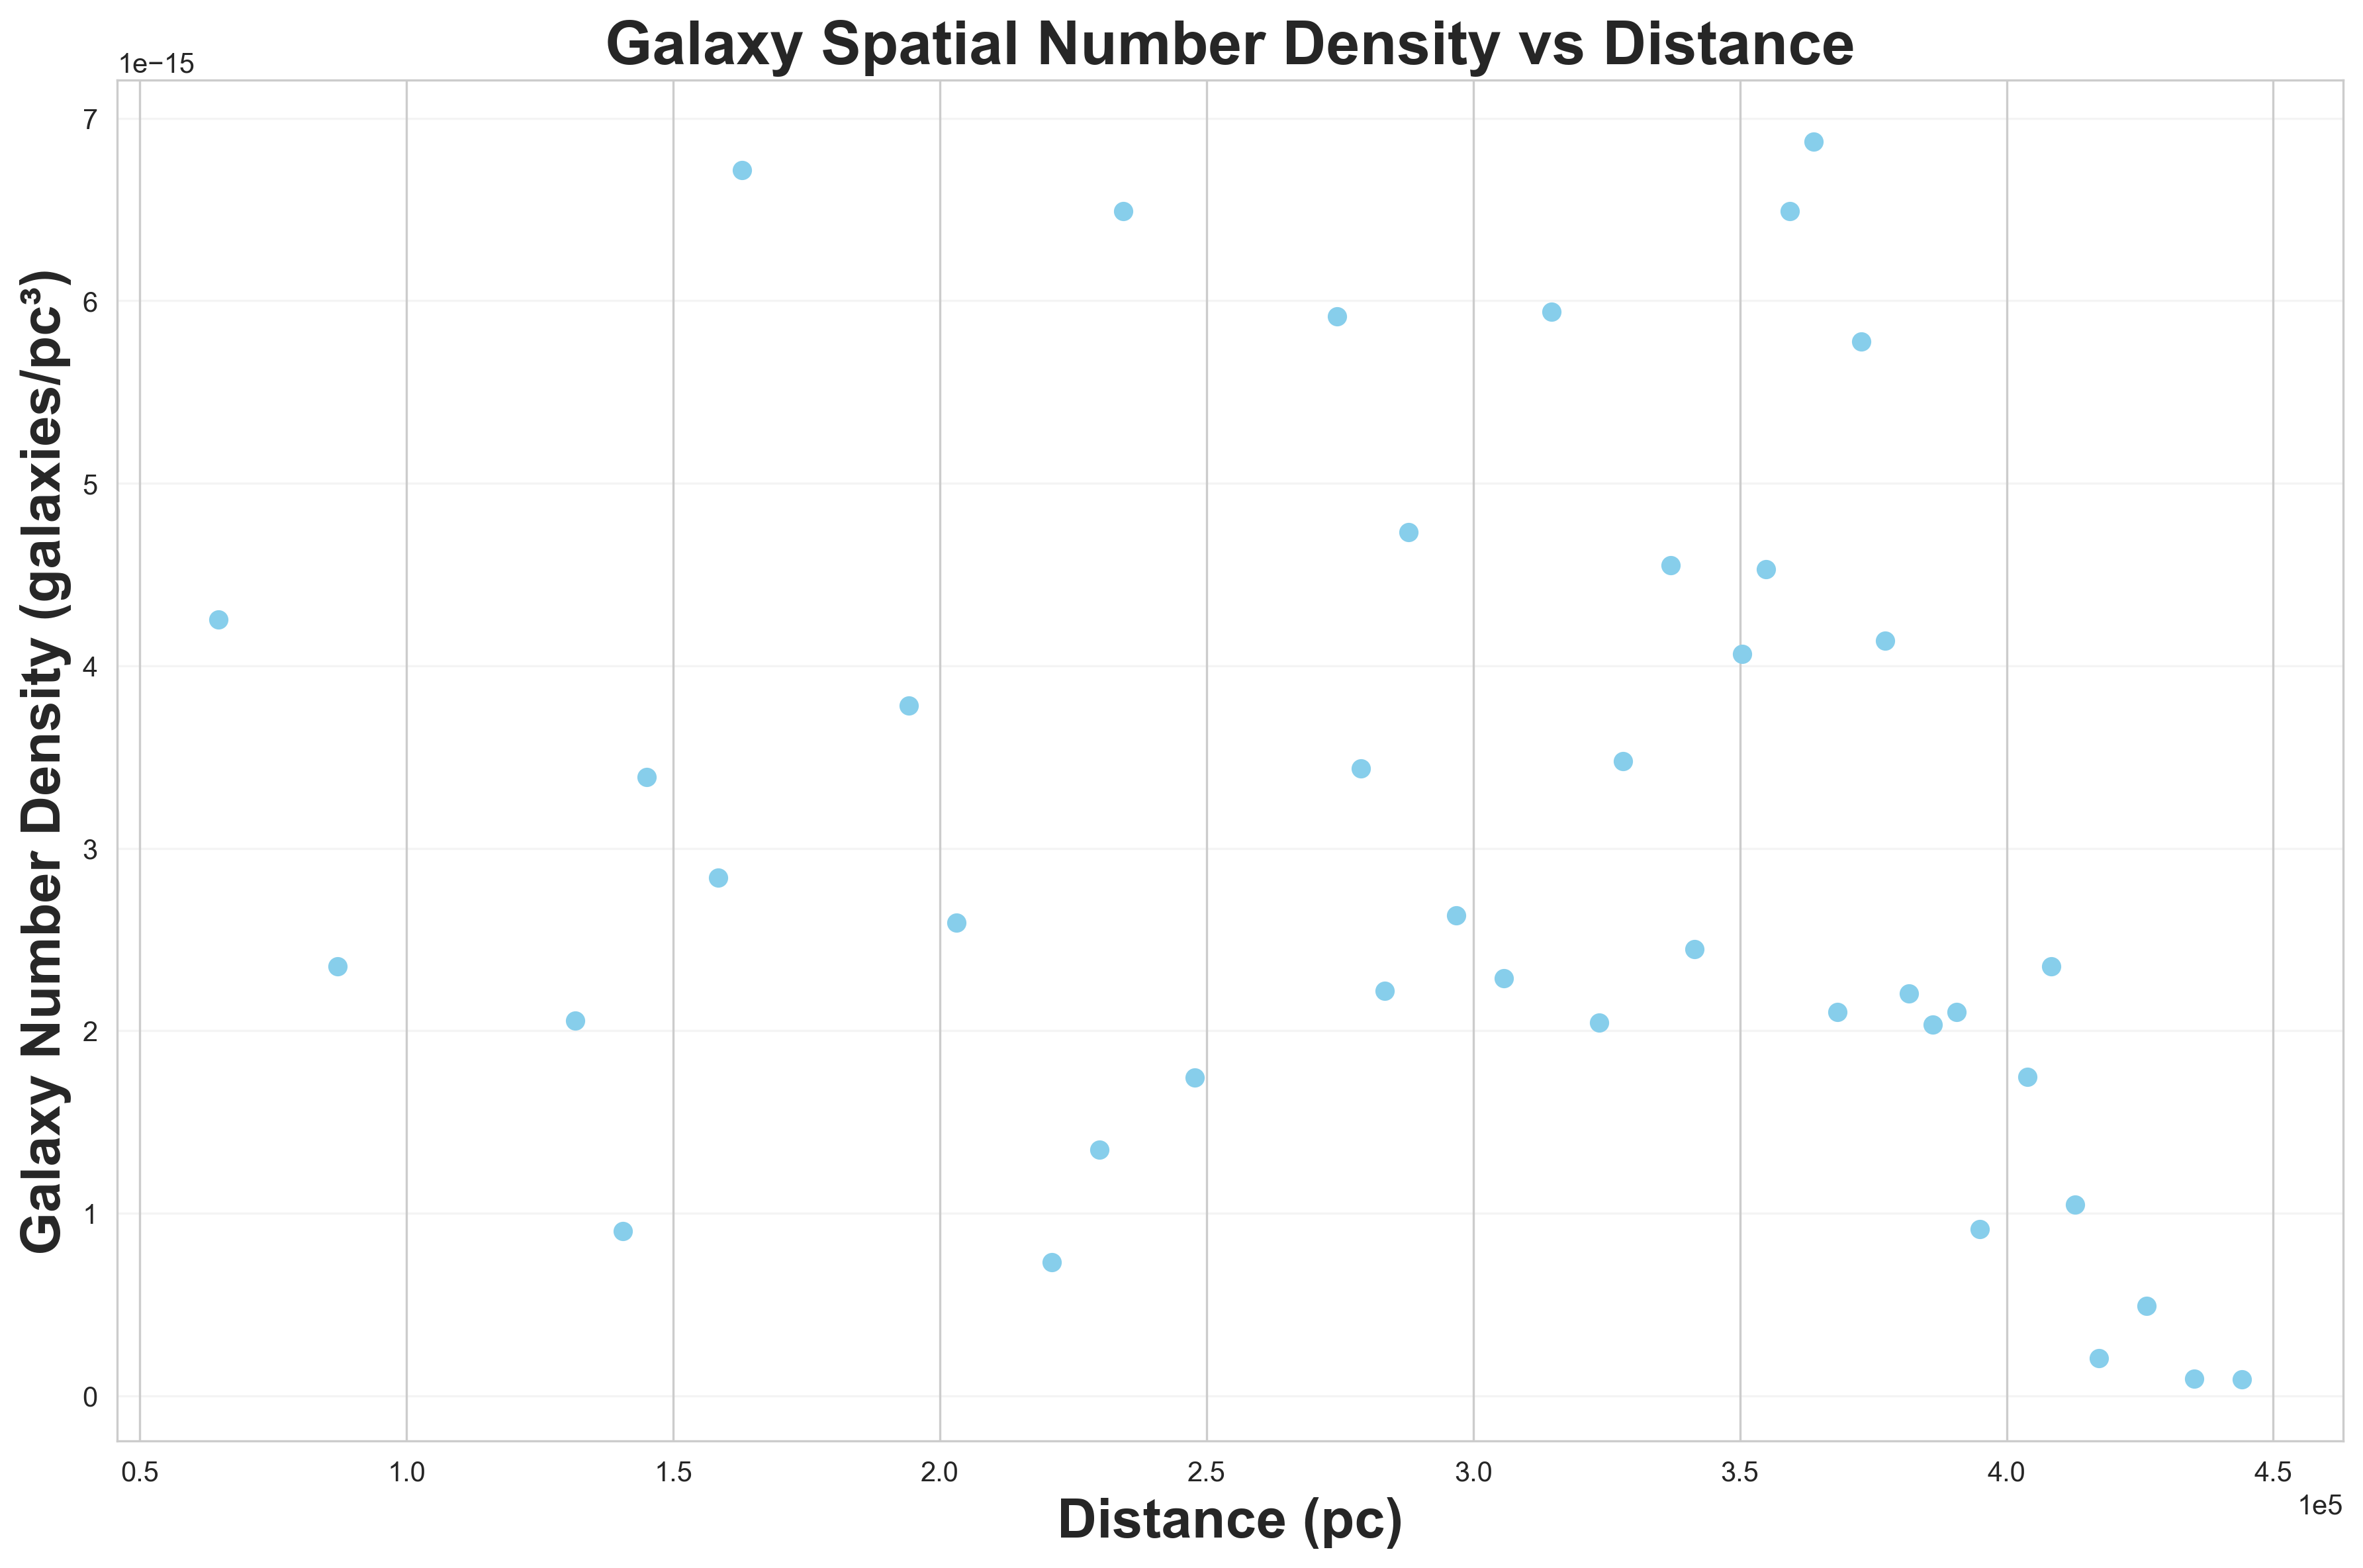

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit


# Read the CSV file
galaxies = pd.read_csv('/Users/kobibrown/Desktop/Distance_Ladder_Project/Clustered_Distant_Galaxies_With_Distances.csv')

# Calculate the maximum distance to create the bins
max_distance = galaxies['Distance'].max()

# Create 100 concentric shells
bin_edges = np.linspace(0, max_distance, 101)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate the number of galaxies in each shell
galaxy_counts, _ = np.histogram(galaxies['Distance'], bins=bin_edges)

# Calculate the volume of each shell
shell_volumes = (4 / 3) * np.pi * (bin_edges[1:]**3 - bin_edges[:-1]**3)

# Calculate the galaxy number density for each shell
galaxy_number_density = galaxy_counts / shell_volumes


# Update the bin_centers and galaxy_number_density arrays to keep only non-outliers
bin_centers_no_outliers = bin_centers[non_outlier_indices]
galaxy_number_density_no_outliers = galaxy_number_density[non_outlier_indices]

# Set the lower limit for density values
density_limit = 0.00001e-14  # Replace this value with your desired limit

# Find the indices of non-outliers, non-zero densities, and above the density_limit
non_outlier_indices = np.where((galaxy_number_density > lower_bound) & (galaxy_number_density < upper_bound) & (galaxy_number_density > 0) & (galaxy_number_density > density_limit))

# Update the bin_centers and galaxy_number_density arrays to keep only non-outliers, non-zero densities, and above the density_limit
bin_centers_no_outliers = bin_centers[non_outlier_indices]
galaxy_number_density_no_outliers = galaxy_number_density[non_outlier_indices]


# Create a plot with distance in pc on the x-axis and galaxy number density on the y-axis
plt.figure(figsize=(12, 8), dpi=300)
sns.set_style('whitegrid')
plt.plot(bin_centers_no_outliers, galaxy_number_density_no_outliers, 'o', color='skyblue')

plt.xlabel('Distance (pc)', fontsize=20, fontweight='bold')
plt.ylabel('Galaxy Number Density (galaxies/pc³)', fontsize=20, fontweight='bold')
plt.title('Galaxy Spatial Number Density vs Distance', fontsize=22, fontweight='bold')

plt.grid(axis='y', alpha=0.2)
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

plt.tight_layout()
plt.savefig('galaxy_number_density_vs_distance.png')
plt.show()


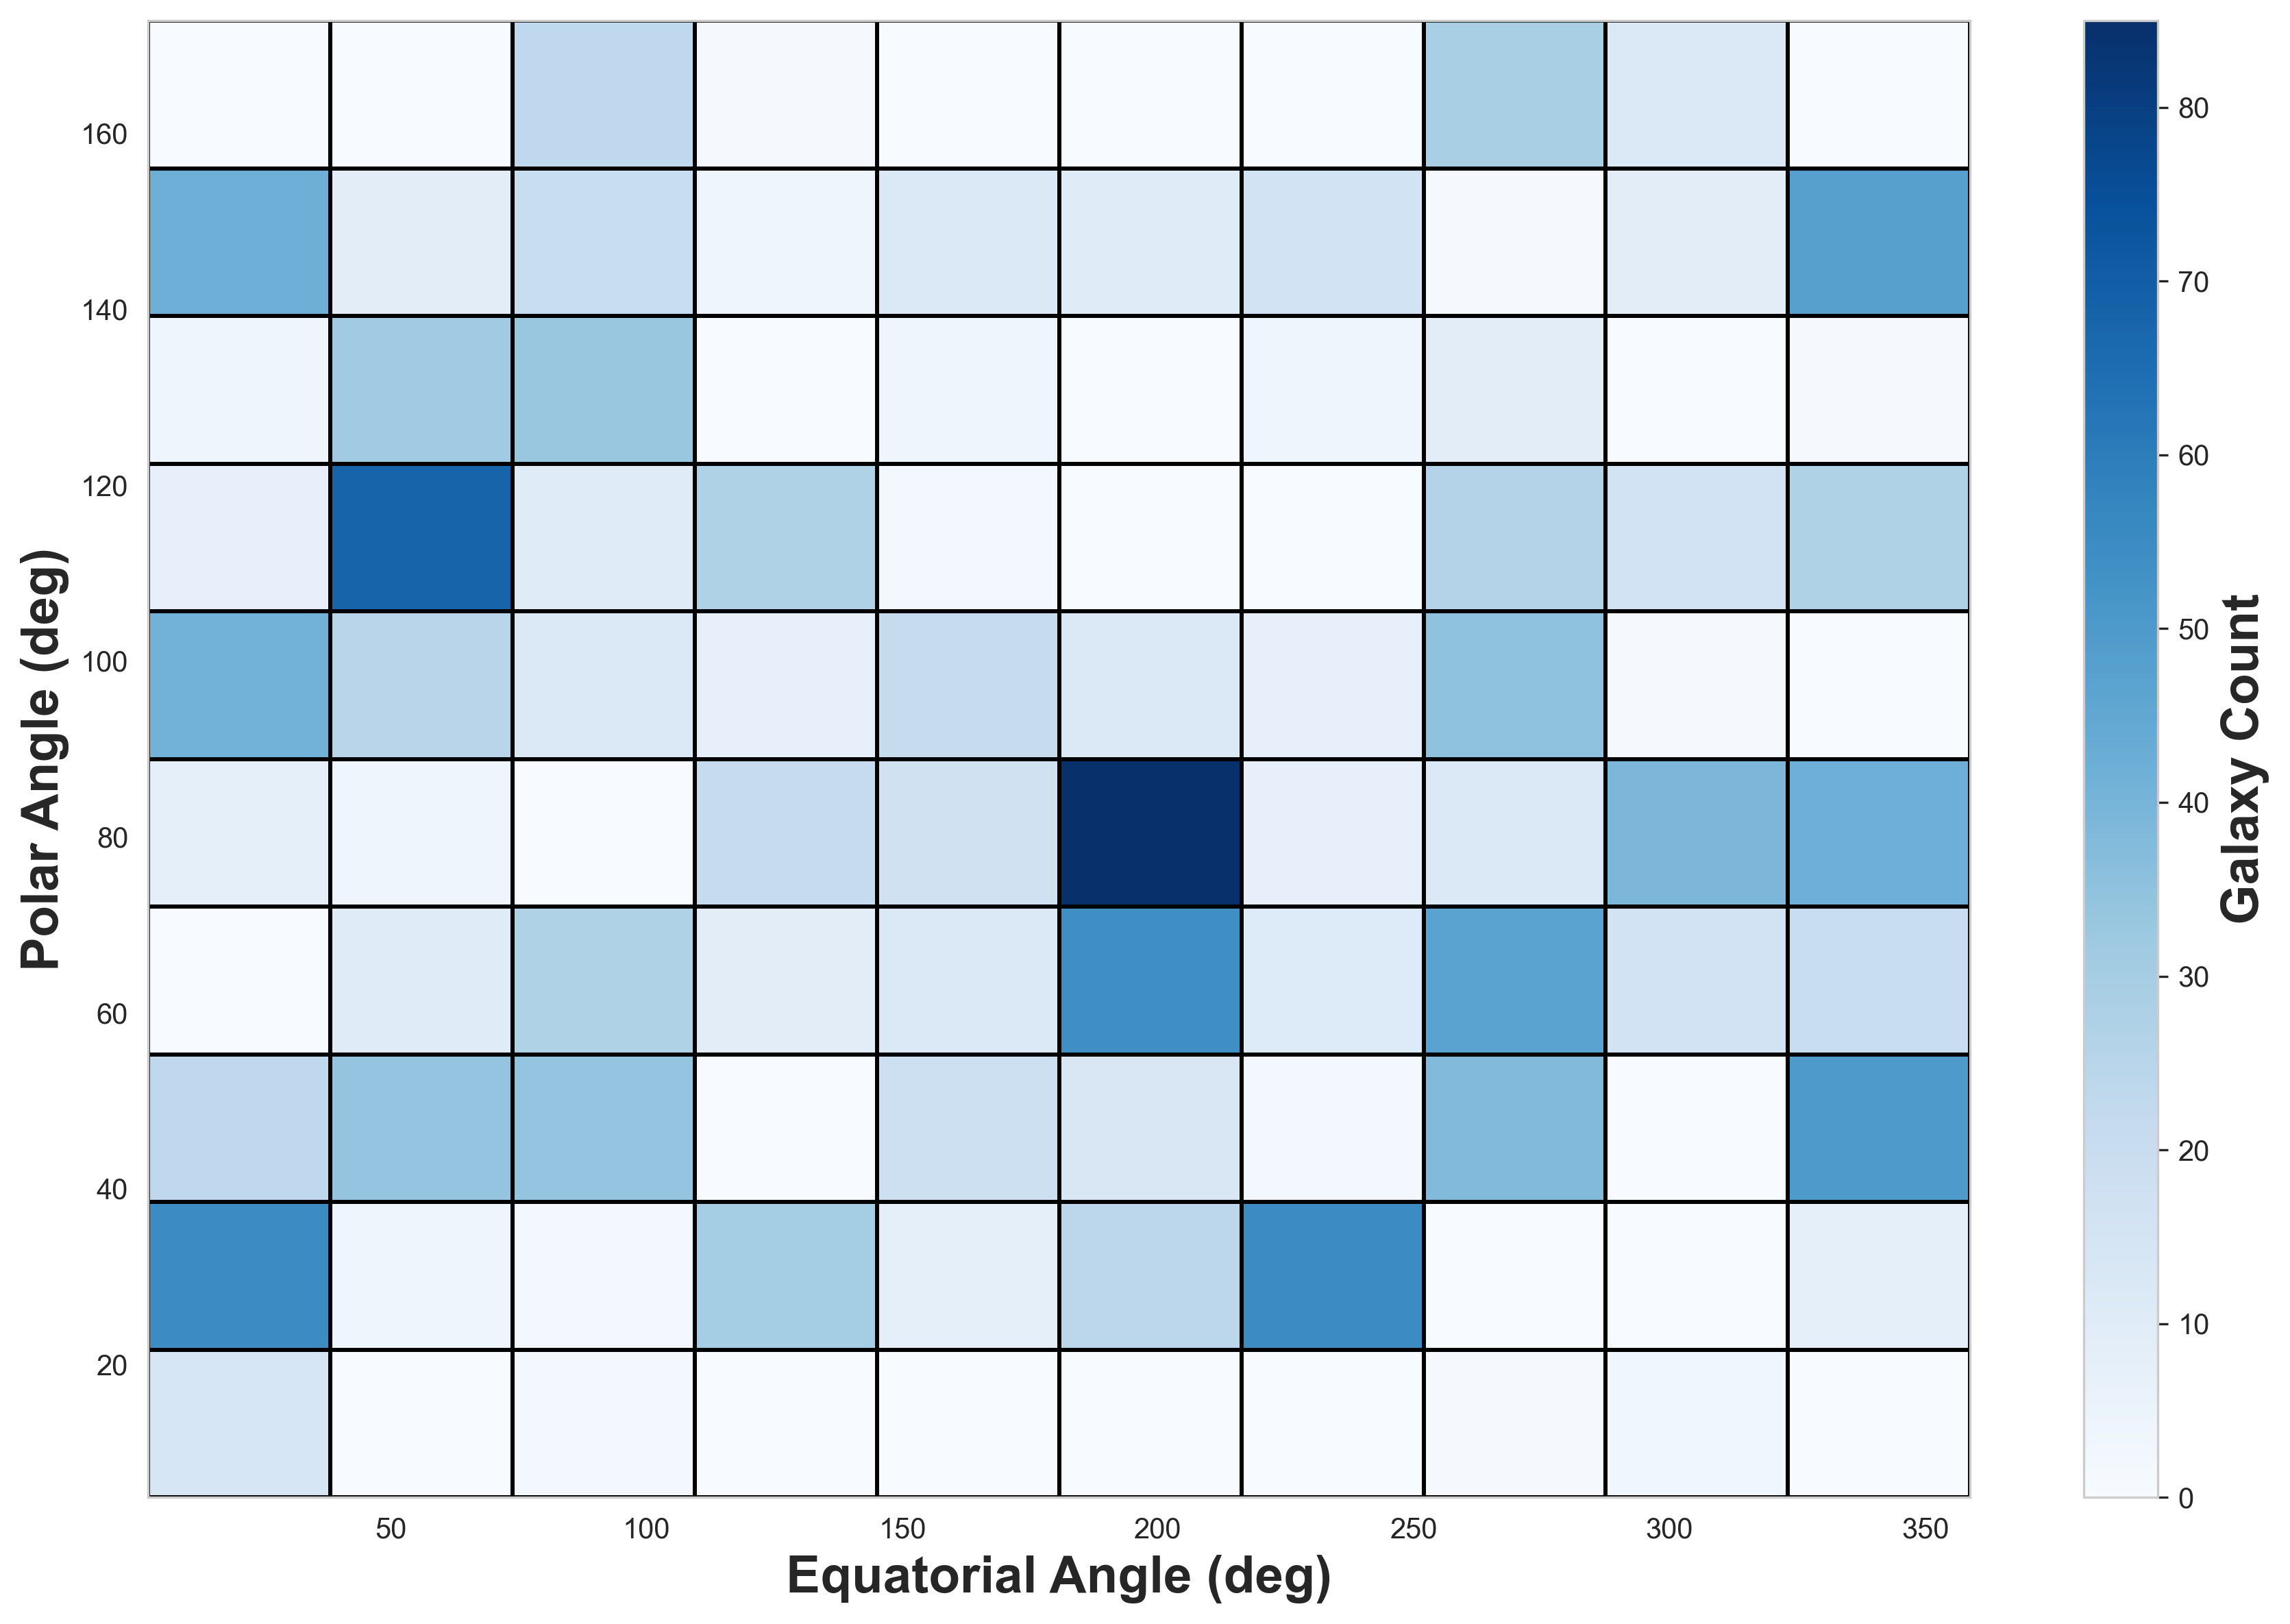

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
galaxies = pd.read_csv('/Users/kobibrown/Desktop/Distance_Ladder_Project/Clustered_Distant_Galaxies_With_Distances.csv')

# Extract the Polar and Equatorial coordinates
polar_coords = galaxies['Polar']
equat_coords = galaxies['Equat']

# Define the number of bins for each axis (10x10 grid for 100 squares)
n_bins = 10

# Calculate the bin edges for each axis
equat_bins = np.linspace(equat_coords.min(), equat_coords.max(), n_bins + 1)
polar_bins = np.linspace(polar_coords.min(), polar_coords.max(), n_bins + 1)

# Plot the heatmap
plt.figure(figsize=(12, 8), dpi=300)
sns.set_style('whitegrid')

X, Y = np.meshgrid(equat_bins, polar_bins)
plt.pcolormesh(X, Y, hist.T, cmap='Blues', edgecolors='k', linewidth=1)

plt.xlabel('Equatorial Angle (deg)', fontsize=18, fontweight='bold')
plt.ylabel('Polar Angle (deg)', fontsize=18, fontweight='bold')
plt.title('', fontsize=18, fontweight='bold')

cbar = plt.colorbar()
cbar.set_label('Galaxy Count', fontsize=18, fontweight='bold')

plt.tight_layout()
plt.savefig('galaxy_distribution_polar_vs_equatorial.png')
plt.show()


# Export cell and galaxy count data to CSV
cell_ids = np.arange(1, n_bins**2+1)
galaxy_counts = hist.flatten().astype(int)
cell_galaxy_data = {'Cell': cell_ids, 'Galaxy Count': galaxy_counts}
cell_galaxy_df = pd.DataFrame(cell_galaxy_data)
cell_galaxy_df.to_csv('/Users/kobibrown/Desktop/Distance_Ladder_Project/isotropy_data.csv', index=False)


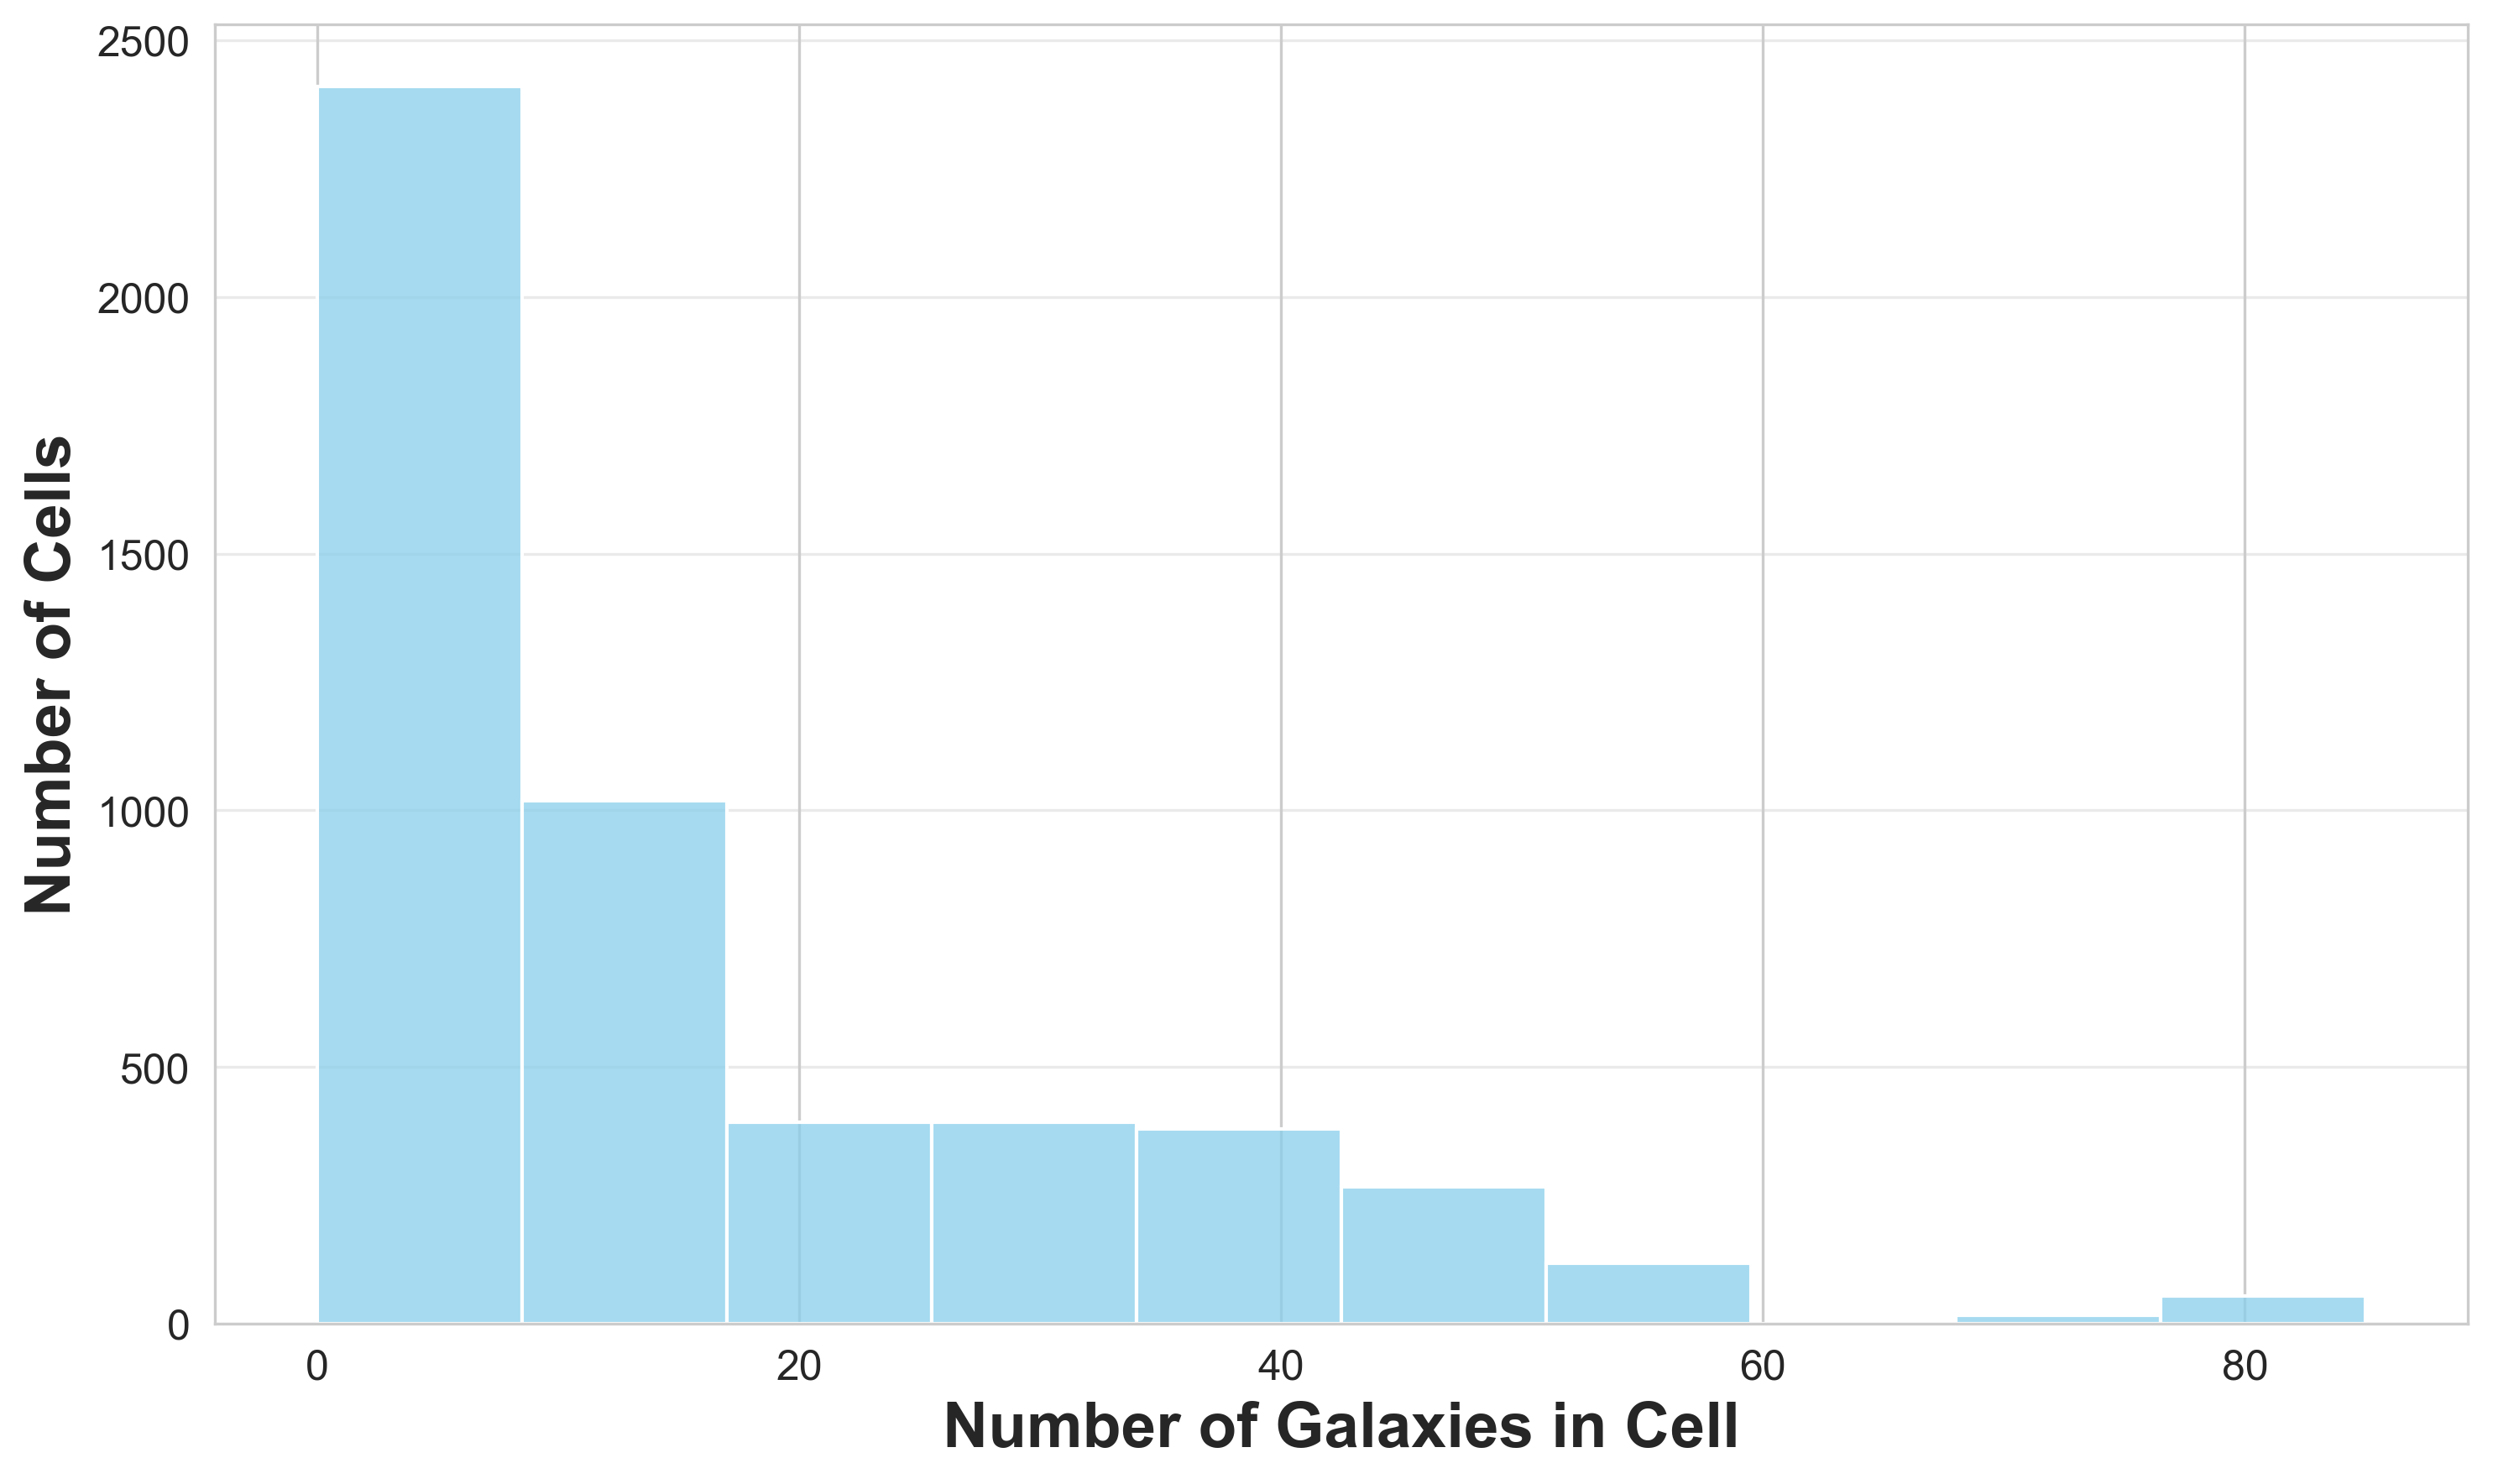

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the csv file into a pandas dataframe
data = pd.read_csv('/Users/kobibrown/Desktop/Distance_Ladder_Project/isotropy_data.csv')

# Create a histogram of the Number of Cells vs Galaxies in Cell
plt.figure(figsize=(10, 6), dpi=300)
sns.set_style("whitegrid")

# Plot the histogram with 50 bins
ax = sns.histplot(x='Galaxy Count', weights='Cell', data=data, bins=10, color="skyblue", kde=False)

# Set title and axis labels
ax.set_title("", fontsize=18, fontweight="bold")
ax.set_xlabel("Number of Galaxies in Cell", fontsize=18, fontweight="bold")
ax.set_ylabel("Number of Cells", fontsize=18, fontweight="bold")

# Set tick parameters
ax.tick_params(axis="both", which="major", labelsize=12)

# Add grid lines and legend
ax.grid(axis="y", alpha=0.4)

# Save and show the plot
plt.tight_layout()
plt.savefig("Number_of_Galaxies_in_Cell_vs_Number_of_Cells.png")
plt.show()
